# Wine Quality Analysis

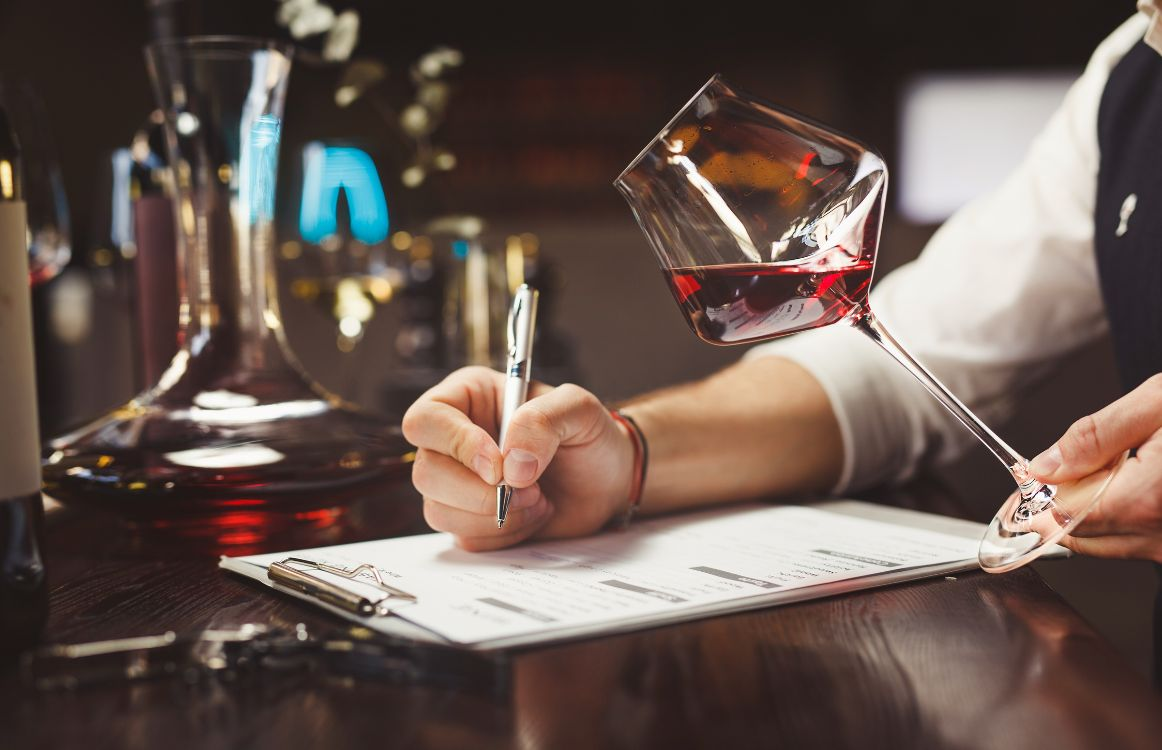

## Introduction

Wine is one of the most popular beverage worldwide. With the numerous varieties of wine available in the market, analysing wine is important for winemakers, vineyard owners and wine enthusiasts alike. While consistency & quality of wine has to be ensured, grading of charcteristics has to be made possible. This helps in carrying out activities of interest, to the respective groups. Effective analysis helps achieve standardisaation in the wine business. Standardisation helps achieve fair business practices, unbiased grading and many more such objectives.

## Project Goal

In order to bring about standardisation in the wine business, it is important to identify & breakdown the characteristics of wine and analyse the factors that contribute to the quality. This could be beneficial for winemakers to optimize production processes and consumers to make informed choices when selecting wines. This analysis aims at analyzing the wine dataset to uncover key factors that influence the quality of wine.

The main objective of the project is to:

1. Study the dataset and conduct exploratory data analysis.

2. Identify the key factors that influence the outcome, by correlation anlysis.

3. Visualise relationship between the features.

4. Provide actionable insights and recommendations for winemakers as well as wine enthusiasts.

## Data Set

The dataset contains 1143 rows and 13 columns. It contains information about various physicochemical properties of wines. 
All columns are numeric.

FEATURES DESCRIPTION:

Fixed acidity: It indicates the amount of tartaric acid in wine and is measured in g/dm3

Volatile acidity: It indicates the amount of acetic acid in the wine. It is measured in g/dm3.

Citric acid: It indicates the amount of citric acid in the wine. It is also measured in g/dm3

Residual sugar: It indicates the amount of sugar left in the wine after the fermentation process is done. It is also measured in g/dm3

Free sulfur dioxide: It measures the amount of sulfur dioxide (SO2) in free form. It is also measured in g/dm3

Total sulfur dioxide: It measures the total amount of SO2 in the wine. This chemical works as an antioxidant and antimicrobial agent.

Density: It indicates the density of the wine and is measured in g/dm3.

pH: It indicates the pH value of the wine. The range of value is between 0 to 14.0, which indicates very high acidity, and 14 indicates basic acidity.

Sulphates: It indicates the amount of potassium sulphate in the wine. It is also measured in g/dm3.

Alcohol: It indicates the alcohol content in the wine.

Quality: It indicates the quality of the wine, which is ranged from 3 to 8. Here, the higher the value is, the better the wine.

## Data preparation and cleaning

The first step of Data peparation is to import the necessary python libraries for data manipulation, visualization, and numerical operations.  

**Pandas** is a powerful data manipulation and analysis library in Python.<br>
**Matplotlib** and **Seaborn** are libraries of python that create statistical visualization.<br>
**Numpy** is the python library to carry out numerical computations.

In [5]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

As the data for analysis here (WineQT.csv") is in csv form, the function read_csv() reads the data from the file and loads it into a Pandas DataFrame df. The data is then displayed below.

In [8]:
# Load the CSV file into a Pandas dataframe 'df'
df = pd.read_csv("WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [10]:
df['Id'].nunique()

1143

.nunique(): Counts the number of unique values in the 'Id' column. <br>
As the column 'Id' contains serial numbers for rows, it is irrelevant for analysis. Hence, that column can be omited.

In [13]:
# Drop column Id
wine_df = df.drop('Id', axis=1, inplace=False)
#Display the columns
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

.drop() function is used to drop specific rows or columns of a datframe.<br>
axis=1 indicates that a column is dropped here. (for dropping rows axis=0 is set)<br>
inplace=False: Ensures that the original DataFrame (df) is not modified. Instead, it returns a new DataFrame(wine_df) with the Id column removed.

In [16]:
# Display dataframe information
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


The .info() method provides a concise summary of the DataFrame. It’s useful for quickly inspecting the dataset’s structure, including:
* Number of rows and columns
* Column names and data types
* Number of non-null values in each column
* Memory usage of the DataFrame

The information confirms that there are no missing values in the dataset. Since missing values can impact the data analysis process, checking for and addressing them, if present, is crucial to ensuring accurate, unbiased, and reliable analysis.

In [19]:
#Checking for duplicate rows
duplicate_count = wine_df.duplicated().sum()
duplicate_count

125

The .duplicated().sum() returns the count of duplicated rows in the dataset. There are 125 duplicate rows in the current dataset. 

Detecting duplicates in the dataset is an important step in data cleaning and preparation. Duplicates can significantly affect the accuracy data analysis. If duplicates are not removed, they can skew summary statistics like the mean, median, and standard deviation resulting in inaccurate analysis. <br>
Duplicated rows unnecessarily increase the size of your dataset, consuming more memory and storage. This can impact performance, especially with large datasets.

In [22]:
#Drop duplicate rows
wine_df = wine_df.drop_duplicates()

In [24]:
#Check the number of columns and rows
wine_df.shape

(1018, 12)

After removing duplicates, the final dataset for analysis has 1018 rows and 12 columns.

In [27]:
wine_df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [29]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,8.288507,0.533541,0.268802,2.524411,0.087187,15.648821,46.325639,0.996700,3.311503,0.656817,10.452456,5.641454
std,1.741324,0.183167,0.196229,1.314850,0.048506,10.176525,33.123533,0.001916,0.157775,0.167542,1.095064,0.811744
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995572,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996665,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.645000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997827,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The describe() function in Pandas provides a quick summary of the key statistics of the numeric columns in a DataFrame.

**Count**: The number of non-null (non-missing) entries in each column. <br>
**Mean**: The average value of the column.<br>
**Standard Deviation (std)**: Measures the amount of variation or dispersion in the column.<br>
**Min**: The minimum value in the column.<br>
**25% (Q1)**: The 25th percentile, or the value below which 25% of the data falls.<br>
**50% (Median)**: The 50th percentile, or the median, where half the data points lie below and half above.<br>
**75% (Q3)**: The 75th percentile, or the value below which 75% of the data falls.<br>
**Max**: The maximum value in the column.<br>

### Distribution of data

Checking the distribution of each feature using Histogram + KDE plot. Each histogram includes a Kernel Density Estimate (KDE) curve, which provides a an estimate of the data's distribution. This helps to visualize the spread and skewness of the data. 

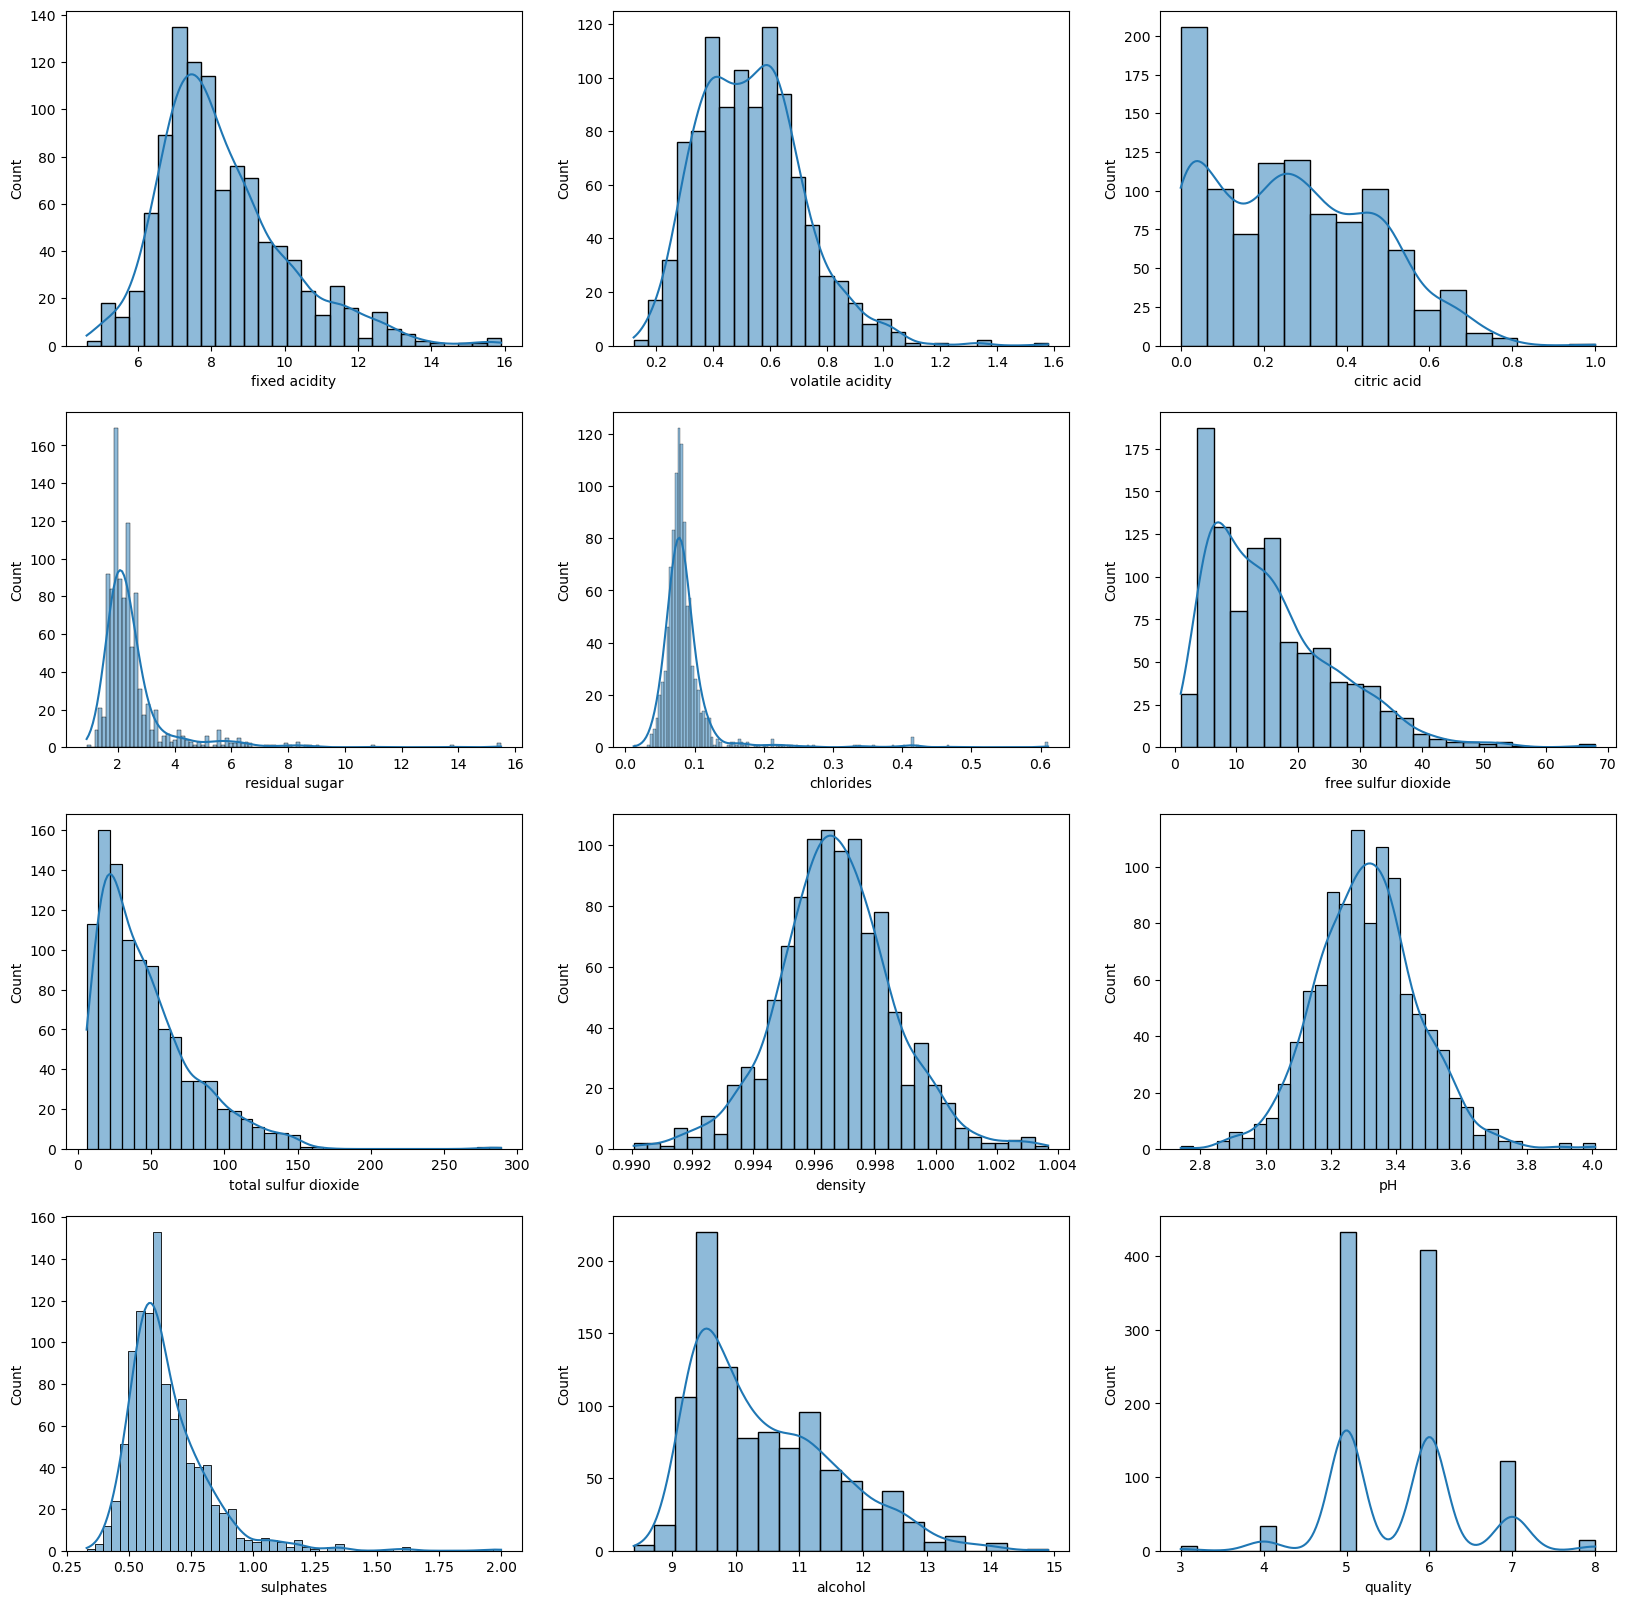

In [58]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))

for i, column in enumerate(wine_df.columns):
    ax = axes.flatten()[i]
    sns.histplot(wine_df[column], kde=True, ax=ax)
plt.show()

In the plot most of the distributions appear to be skewed, which suggests that there are some wines with unusually high levels of these substances. The long tails in some of the distributions suggest the presence of potential outliers. 

While most features such as fixed acidity, volatile acidity, citric acid, sulphates and alcohol show right skewness, residual sugar and chlorides are strongly right skewed. Density and pH has a roughly normal distribution.

### Outliers
Outliers are datapoints that deviate from the rest of the dataset. They lie far away from the mean or meadian and affect analysis.
They are caused by various factors such as measurement errors, data entry mistakes, or natural variations in the data.

As the histogram plot shows potential outliers in the data, it can be more effectively displayed in a box plot.
A boxplot is an effective tool for displaying outliers because it provides a clear, simple visualization of the distribution where the outliers are explicitely marked.
In the plot the box represents the interquartile range and the line inside the box is the median. The datapoints marked as circles indicate potential outliers. 

The box plots show that there are significant outliers in the most of the columns. As the outliers impact data analysis, it is important to remove them.
The plots shows that the columns volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates' has significant outliers. 

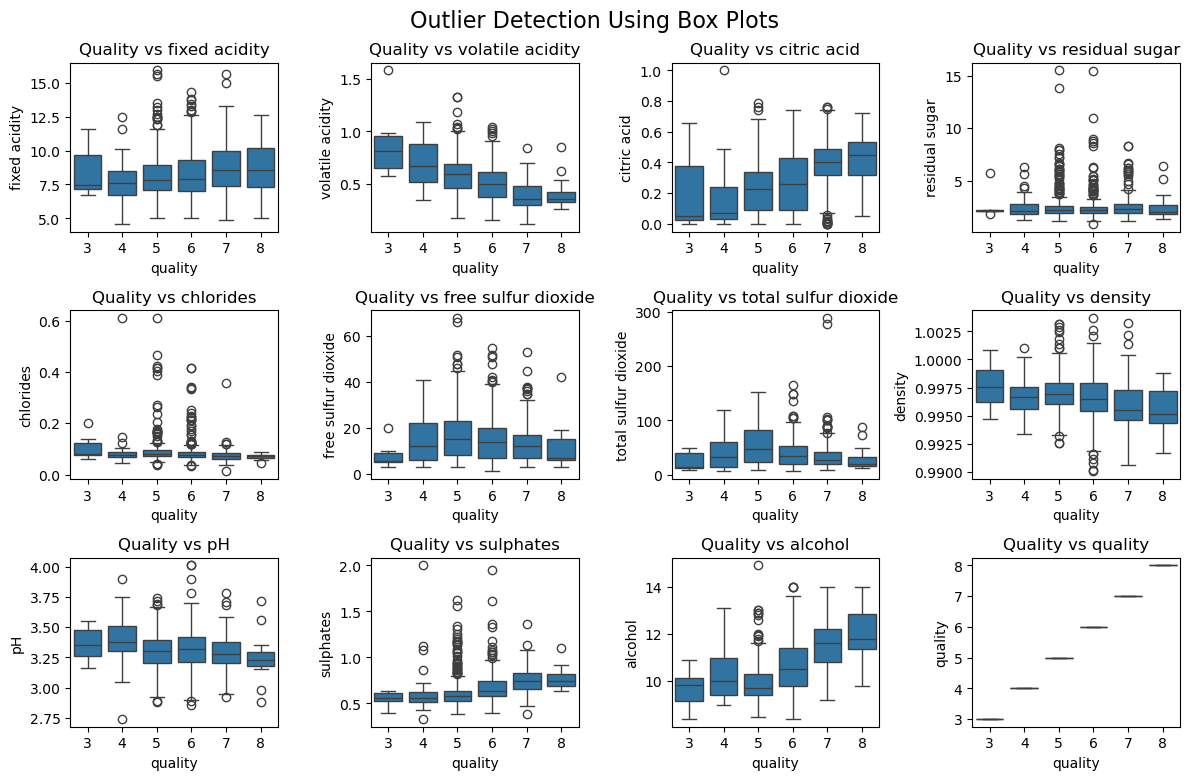

In [36]:
# Creating Subplots
plt.figure(figsize=(12, 10))


for i, column in enumerate(wine_df.columns[0:], 1):
    plt.subplot(4, 4, i)  
    sns.boxplot(x='quality', y=column, data=wine_df)
    plt.title(f'Quality vs {column}')

plt.suptitle("Outlier Detection Using Box Plots", fontsize=16)
plt.tight_layout()
plt.show()

### Detecting and Removing Outliers

Idenifying and managing outliers in the data are crucial for efficient data analysis. 
There are various methods to remove outliers. For highly skewed data, Interquartile Range (IQR) is one popular and straightforward method used to identify potential outliers. 

The IQR method helps identify extreme vlues by calculating the range(IQR) between the first quartile (Q1, 25th percentile)) and third quartile (Q3, 75th percentile). Outliers are typically defined as values that are:
1. below the lower limit (Q1 - 1.5 * IQR)
   and
2. above the upper limit (Q3 + 1.5 * IQR)

In [39]:
outlier_columns = ['volatile acidity', 'residual sugar', 'chlorides', 
                   'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

# Calculate the upper and lower limits
Q1 = wine_df[outlier_columns].quantile(0.25)
Q3 = wine_df[outlier_columns].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter dataset
wine_df_cleaned = wine_df[((wine_df[outlier_columns] >= lower_limit) & (wine_df[outlier_columns] <= upper_limit)).all(axis=1)]

.all(axis=1) ensures that all columns in each row satisfies the condition. In other words, a row is included in wine_df_cleaned only if every feature in outlier_columns is within the specified limits.

In [41]:
wine_df_cleaned.shape

(805, 12)

After removing outliers, the number of rows have reduced from 1018 to 805.

## Feature Selection

Feature selection is the process of identifying and selecting the most relevant features (independent variables) from the dataset that provides valuable insights in data analysis.
**Filter method** using Correlation Matrix is one of the effective feature selection method. Correlation Matrix uses statistical techniques to evaluate the importance of each feature based on its relationship with the target variable. <br>Correlation matrix can be easily visualised using a heatmap that uses colout gradient to represent values. 

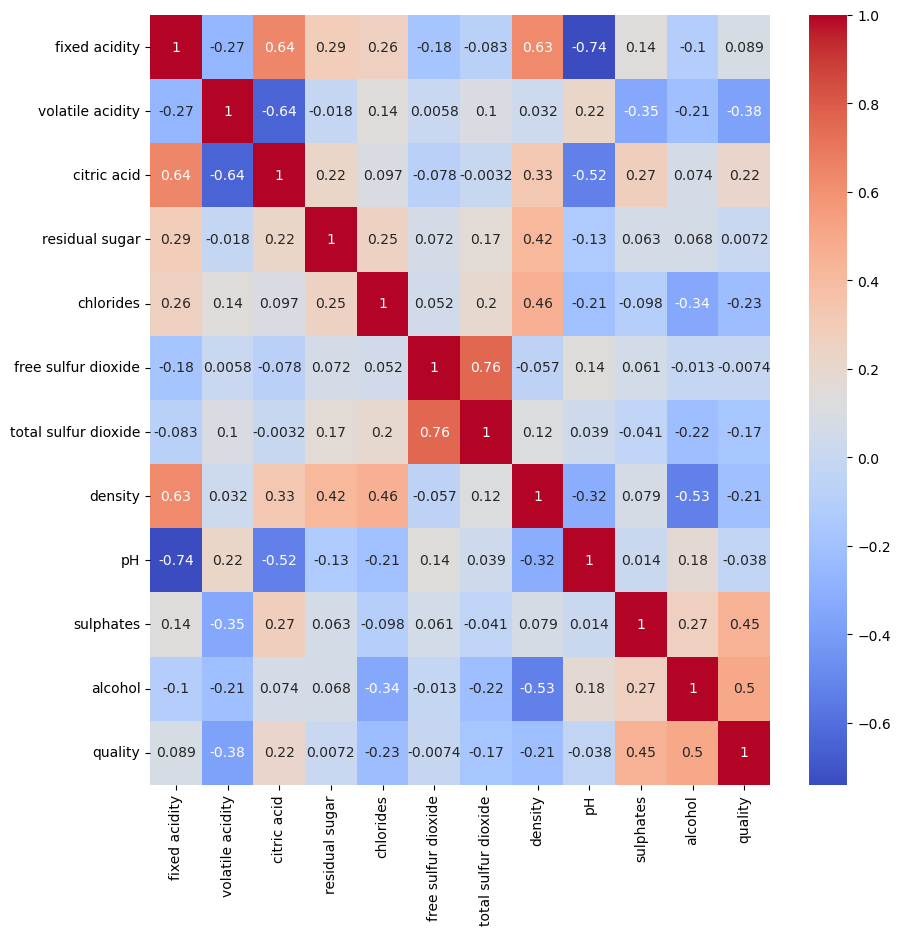

In [46]:
# Calculate Spearman correlation
correlation_matrix = wine_df_cleaned.corr(method='spearman')
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

### Filtering features from correlation matrix
From the correlation matrix, features that have significant correlation with the target variable 'quality', is selected by applying a correlation threshold. <br>
Based on the matrix, the threshold value selected in 0.2. <br>Next step is to filter the features with absolute value of correlation coefficients above 0.2.

In [51]:
#Select features with correlation > 0.2 or < -0.2
correlation_threshold = 0.2
correlated_features = correlation_matrix['quality'].abs() > correlation_threshold
selected_features = correlation_matrix.columns[correlated_features].tolist()

wine_selected_df = wine_df_cleaned[selected_features]
wine_selected_df

,volatile acidity,citric acid,chlorides,density,sulphates,alcohol,quality
0,0.700,0.00,0.076,0.99780,0.56,9.4,5
1,0.880,0.00,0.098,0.99680,0.68,9.8,5
2,0.760,0.04,0.092,0.99700,0.65,9.8,5
3,0.280,0.56,0.075,0.99800,0.58,9.8,6
5,0.660,0.00,0.075,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...
1138,0.510,0.13,0.076,0.99574,0.75,11.0,6
1139,0.620,0.08,0.068,0.99651,0.82,9.5,6
1140,0.600,0.08,0.090,0.99490,0.58,10.5,5
1141,0.550,0.10,0.062,0.99512,0.76,11.2,6


**By applying filtering methos, the features selected for further analysis are volatile acidity, citric acid,	chlorides, density, sulphates and alcohol.**

## Data Visualization

**Distribution of wine quality ratings**

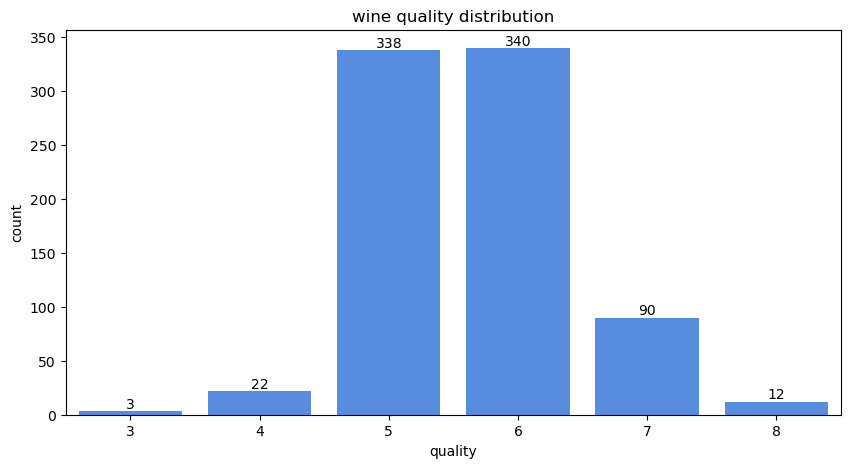

In [55]:
figure = plt.figure(figsize = (10,5))
ax = sns.countplot(x = "quality", data = wine_selected_df, color = '#4287f5')
plt.title("wine quality distribution")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

The bar plot shows the distribution of wine quality ratings. <br>
Quality 5 and 6 are the most frequent, with counts of 338 and 340, respectively.
These two categories make up a significant portion of the entire dataset.

**Volatile acidity Vs Quality** <br>
Relationship between volatile acidity and wine quality can be plotted using a box plot. 

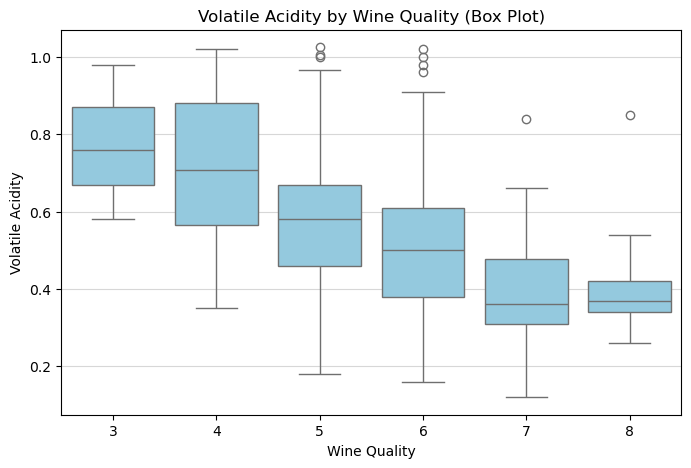

In [59]:
# Create a box plot for Volatile Acidity vs. quality
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='volatile acidity', data=wine_selected_df, color='skyblue')

# Customizing the chart
plt.title('Volatile Acidity by Wine Quality (Box Plot)')
plt.xlabel('Wine Quality')
plt.ylabel('Volatile Acidity')
plt.grid(axis='y', alpha=0.5)
plt.show()

Observations:<br>
The box plot clearly shows an inverse relationship between volatile acidity and wine quality. As wine quality increases (from 3 to 8), the median  volatile acidity decreases.<br>
This aligns with the negative correlation coefficient in the correlation matrix.<br>
The relationship in the bar plot aligns with common knowledge in winemaking, where higher volatile acidity is often associated with "off" flavors of wines.

**Citric Acid Vs Quality** <br>
Relationship between volatile acidity and wine quality can be plotted using a box plot.

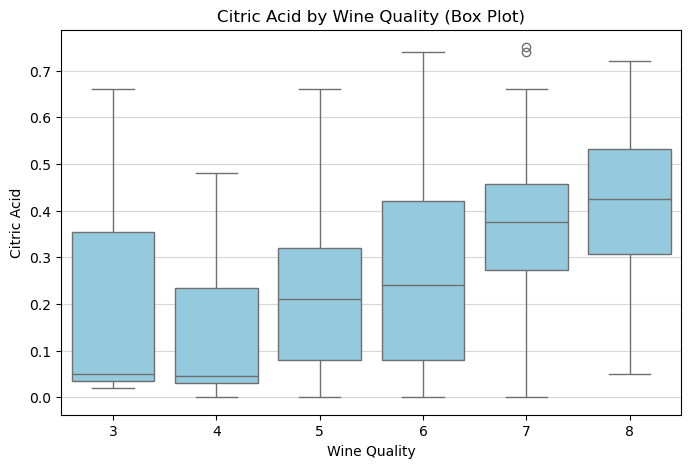

In [63]:
# Create a box plot for citric acid vs. quality
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='citric acid', data=wine_selected_df, color='skyblue')

# Customizing the chart
plt.title('Citric Acid by Wine Quality (Box Plot)')
plt.xlabel('Wine Quality')
plt.ylabel('Citric Acid')
plt.grid(axis='y', alpha=0.5)
plt.show()

Observations:<br>
The box plot shows a positive relationship between citric acid and wine quality. As wine quality increases (from 3 to 8), the median citric acid content tends to increase. <br>
Wines rated 3 and 4 have the lowest medians, while quality 7 and 8 wines have significantly higher median citric acid values. This suggests that higher citric acid is associated with higher quality wines.

**Chlorides Vs Quality** <br>
Relationship between chlorides and wine quality can be plotted using a box plot.

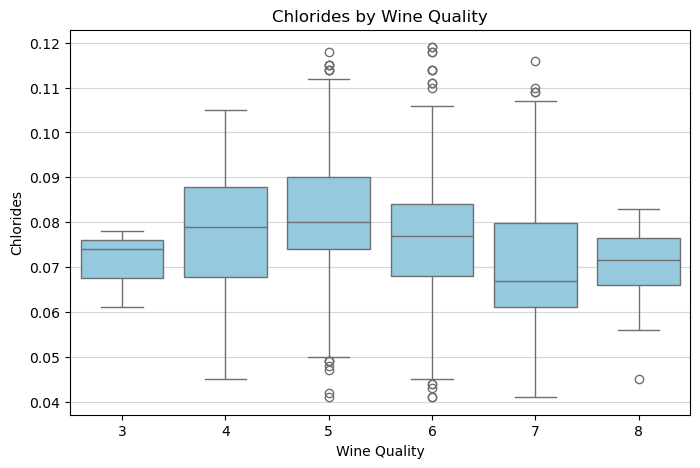

In [67]:
# Create a box plot for chlorides vs. quality
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='chlorides', data=wine_selected_df, color='skyblue')

# Customizing the chart
plt.title('Chlorides by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Chlorides')
plt.grid(axis='y', alpha=0.5)
plt.show()

Onservations:<br>
This is a box plot showing the distribution of chloride levels in wine categorized by wine quality ratings (3 to 8). 
The plot suggests that chlorides have a weak relationship with wine quality. However, for higher quality wines, chloride levels are lower. This suggests that there could be a weak negative correlation with wine quality.<br>
The lack of a clear trend and the high variability indicate that chlorides might not be a strong predictor of wine quality in this dataset.

**Density Vs Quality**<br>
Relationship between density and wine quality can be plotted using a box plot.

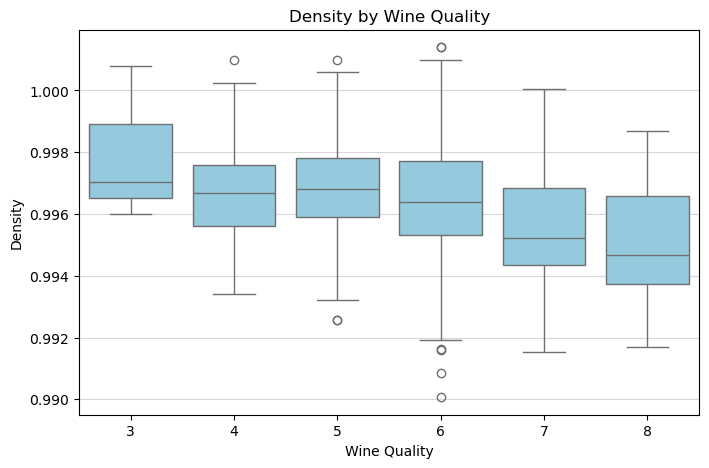

In [71]:
# Create a box plot for density vs. quality
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='density', data=wine_selected_df, color='skyblue')

# Customizing the chart
plt.title('Density by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.5)
plt.show()

Observations: <br>
The box plot shows a slight negative correlation between density and wine quality. As wine quality increases (from 3 to 8), the median density tends to decrease. <br>
Higher-quality wines (7 and 8) tend to have lower densities, whereas lower-quality wines (3 to 5) have higher densities.

**Sulphates Vs Quality**<br>
Relationship between sulphates level and wine quality can be plotted using a box plot.

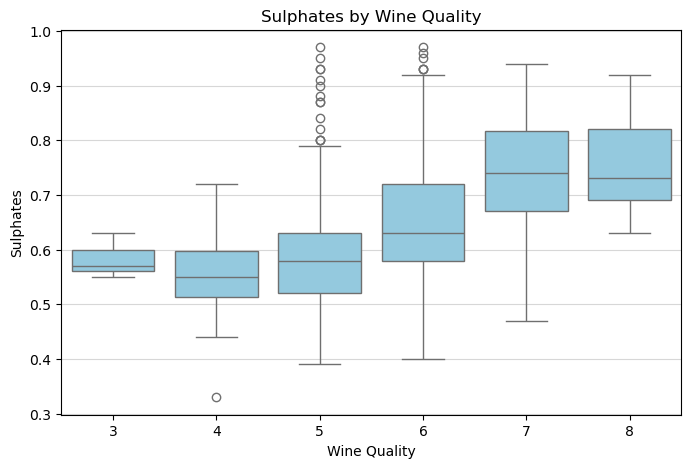

In [75]:
# Create a box plot for sulphates vs. quality
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='sulphates', data=wine_selected_df, color='skyblue')

# Customizing the chart
plt.title('Sulphates by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Sulphates')
plt.grid(axis='y', alpha=0.5)
plt.show()

Observations: <br>
The box plot clearly shows a positive trend between sulphates and wine quality. As wine quality increases (from 3 to 8), the median sulphate content tends to increase. This suggests that higher sulphate levels are associated with higher quality wines.

**Alcohol Vs Quality**<br>
Relationship between alcohol and wine quality can be plotted using a box plot.

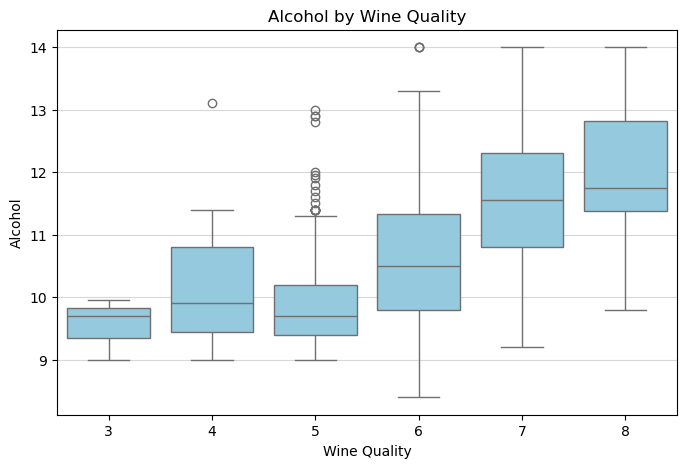

In [79]:
# Create a box plot for alcohol vs. quality
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol', data=wine_selected_df, color='skyblue')

# Customizing the chart
plt.title('Alcohol by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol')
plt.grid(axis='y', alpha=0.5)
plt.show()

Observations:<br>
The box plot shows a strong positive trend between alcohol content and wine quality. As wine quality increases (from 3 to 8), the median alcohol content tends to increase significantly. This suggests that higher alcohol levels are strong predictors of quality of wines.

## Insights
*From the analysis it is clear that higher quality wines tend to have higher alcohol content, higher sulphate levels, and higher citric acid content.

*Volatile acidity density has a reverse relationship with quality. Lower quality wines tend to have higher volatile acidity.

*Chlorides and density not strong indicators of wine quality.

*The presence of extreme values in some columns suggests that other factors or specific winemaking practices might be influencing the chemical composition of some wines.

## Conclusion

Class imbalance: The distribution of wine quality ratings is highly imbalanced, with a significant dominance of quality ratings 5 and 6.  This may impact data analysis and decision-making.

Chemical Properties Influence Wine Quality.<br>
Strong Predictors: Alcohol content, sulphates, volatile acidity, and citric acid are significant predictors of wine quality.
Weak Predictors: Although chlorides and density show a relationship with wine quality, they have a weaker influence.

## Recommendation
A more comprehensive and accurate wine quality analysis can be achieved by incorporating additional features that influence wine characteristics. While current studies focus on chemical properties such as sulphates, acidity, and density, expanding the scope of analysis to include factors like quality evolution over time, winemaking techniques, weather and climate conditions, and grape varieties will provide deeper insights into the complex factors affecting wine quality.

In [87]:
wine_selected_df.to_excel(r'D:\Nimmy\XDI\Capstone Project\powerbi\wine_final_data.xlsx',  index=False)